In [1]:
import pandas as pd
import os
import re

cell_voltages = [ f'Cell_Voltage{i}' for i in range(1,13)]

path = './2st/'
df = pd.DataFrame()

for f in os.listdir(path):
    module = pd.read_excel(path+f, index_col = 0)
    module_number = int(module["Module"].mean())
    module.drop(["MIN_CELL_VOLT", "MIN_CELL_Volt_Pt", "MAX_CELL_VOLT", "MAX_CELL_Volt_Pt"], axis = 1, inplace = True)
    for c in module.columns:
        if "Module" == c:
            continue
        if "Cell_Voltage" in c:
            cell_numbers = (module_number-1) * 12 + int(re.sub(r'[^0-9]', '', c)) 
            module.rename(columns={c : "Cell_Voltage" + str(cell_numbers)}, inplace=True)
        else:
            module.rename(columns={c : c + str(module_number)}, inplace=True)
    df = pd.concat([df,module], axis=1)

In [2]:
df.drop(["Module"],axis=1,inplace=True)

In [12]:
df.to_csv("./total_experiment_all_cell.csv")

In [5]:
df.columns

Index(['Cell_Voltage1', 'Cell_Voltage2', 'Cell_Voltage3', 'Cell_Voltage4',
       'Cell_Voltage5', 'Cell_Voltage6', 'Cell_Voltage7', 'Cell_Voltage8',
       'Cell_Voltage9', 'Cell_Voltage10',
       ...
       'Cell_Voltage99', 'Cell_Voltage100', 'Cell_Voltage101',
       'Cell_Voltage102', 'Cell_Voltage103', 'Cell_Voltage104',
       'Cell_Voltage105', 'Cell_Voltage106', 'Cell_Voltage107',
       'Cell_Voltage108'],
      dtype='object', length=204)

In [3]:
for c in df.columns:
    if not "Cell_Voltage" in c:
        df.drop([c], axis=1, inplace=True)

In [6]:
df.mean(axis=1)
df.max(axis=1)
df.min(axis=1)
(df.max(axis=1)-df.min(axis=1)).max()

0.15629999999999988

In [112]:
import matplotlib.pylab as plt
import seaborn as sns

charge_start_time = pd.to_datetime('2022-03-29  8:30:00 PM')
charge_end_time = pd.to_datetime('2022-03-30  12:50:00 AM')

charge = df[charge_start_time:charge_end_time]

hist = pd.DataFrame(index = df.index, columns = [2.8 + 0.05*i for i in range(int((4.1-2.8)//0.05)+2) ])

plt.rcParams['figure.figsize'] = [16, 10]

#64개로 나누자 -> rgb 값(n * 4-1,0,0)

#plt.plot(charge.index, charge.mean(axis=1))
#plt.plot(charge.index, charge.max(axis=1))
#plt.plot(charge.index, charge.min(axis=1))


#plt.plot(charge.index, charge.max(axis=1)-charge.min(axis=1))

#a = sns.distplot(charge.iloc[9000])
#plt.pcolor(df)

In [103]:
print(df.min().min())
print(df.max().max())

2.8094
4.097


In [40]:
pd.to_datetime('2022-04-06  13:00:00').second

0

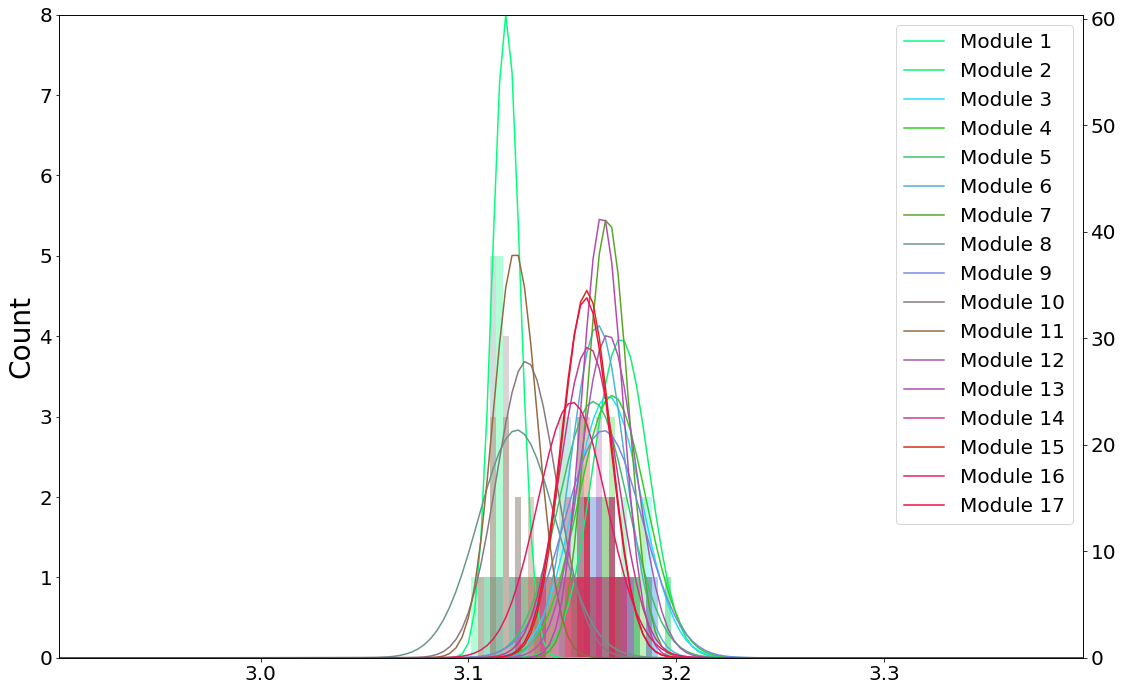

In [12]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import seaborn as sns

## Module별 cell 전압에 대한 Histograms 출력(종합)
## x축 : voltage, y축 : cell voltage의 count

plt.rc('font', size=20)

fig, ax1 = plt.subplots(figsize=(16,10))
ax2 = ax1.twinx()

#max voltage : 4.2V, 14:34:43/44
#max voltage to resting : 4.032V, 15:17:30
#min voltage : 3.02V, 19:47:42
#end : 20:45:00

t = pd.to_datetime('2022-04-06  20:45:00') # t 시간의 histogram 출력

hist_std = 0.003
xmin = 10
xmax = 0
ymax = 0.0

for i in range(0,12*17,12):
    
    #fig, ax1 = plt.subplots(figsize=(16,10))
    #ax2 = ax1.twinx()

    mdata = df.loc[t][i:i+12]

    mu = mdata.mean()
    sigma = mdata.std()
    
    n, bins = np.histogram(mdata, bins= [2.8 + hist_std*i for i in range(int((4.1-2.8)//hist_std)+2) ])  # histogram 계산

    r = i//12  / 17
    g = 1-r
    b = float(np.random.rand(1))
    
    
    #s = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    s = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(bins-mu)**2 / (2 * sigma**2))

    ax1.bar(bins[:-1],n, alpha = 0.3, width=hist_std, color=[r,g,b])         # bar 형식의 histogram 출력
    ax2.plot(bins, s, alpha = 1, color=[r,g,b], label = f"Module {i//12+1}") # graph 형식의 histogram 출력
    
    curr_x_max = bins[np.where(n != 0)[0][-1]]
    curr_x_min = bins[np.where(n != 0)[0][0]]
    xmax = max(xmax, curr_x_max)
    xmin = min(xmin, curr_x_min)
    ymax = max(ymax,max(s))

ax1.set_ylabel("Count", fontsize=28)
ax1.set_ylim([0,8])
ax2.set_xlim([xmin-0.2,xmax+0.2])
ax2.set_ylim([0,ymax])

fig.tight_layout()
plt.legend()
plt.savefig(f"./2st_fig/voltage_histogram/{t.year}_{t.month}_{t.day}_{t.hour}_{t.minute}_{t.second} voltage histogram.jpg", dpi=256)

plt.show()

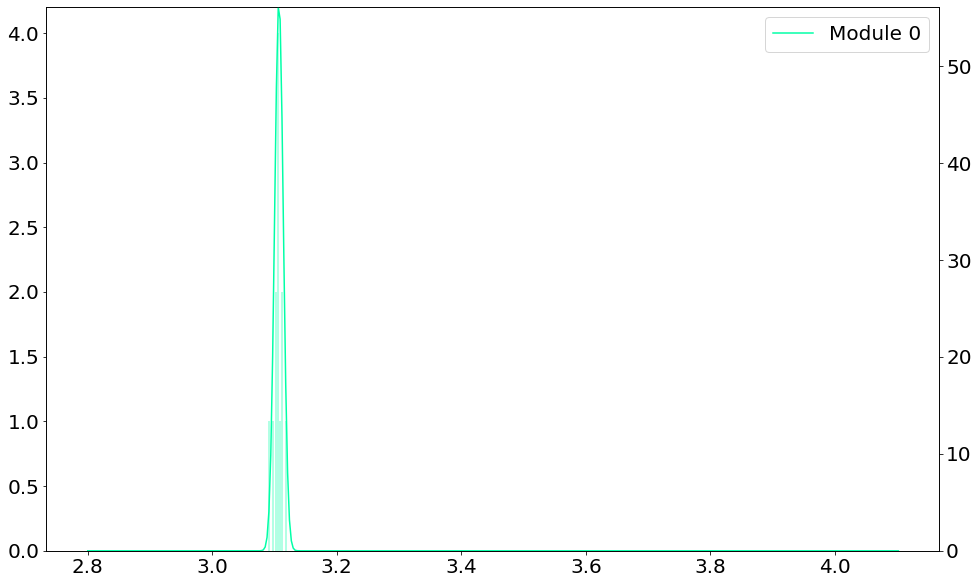

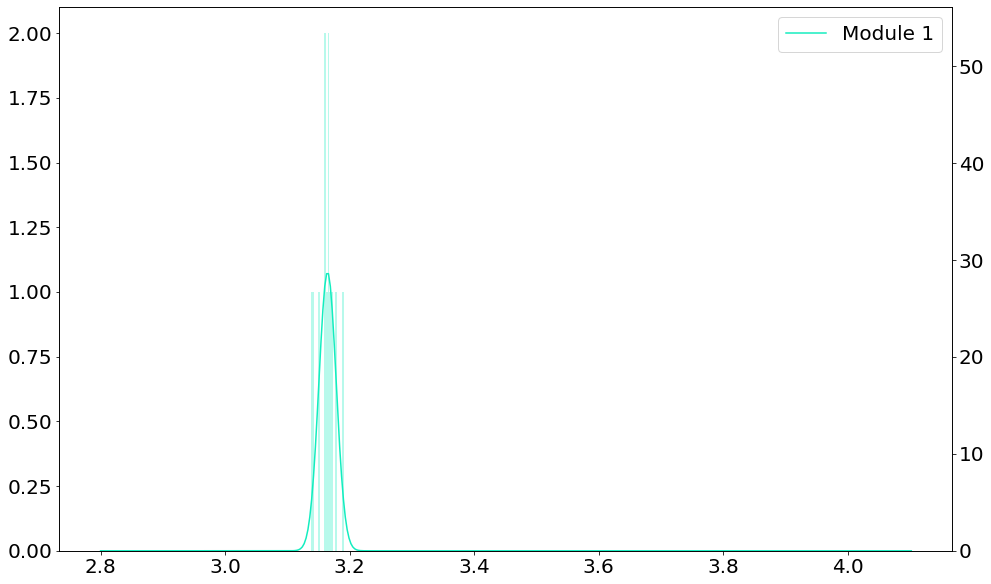

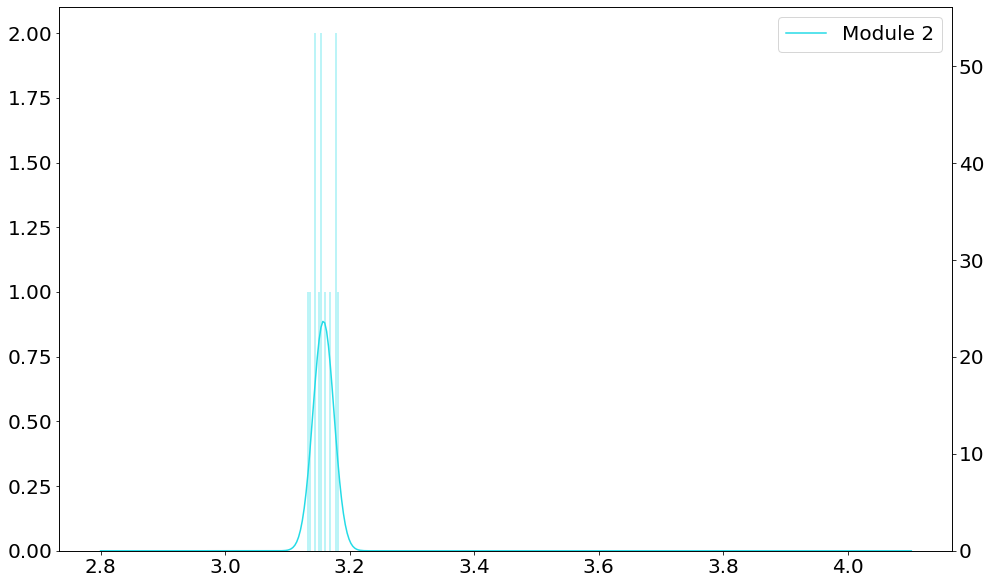

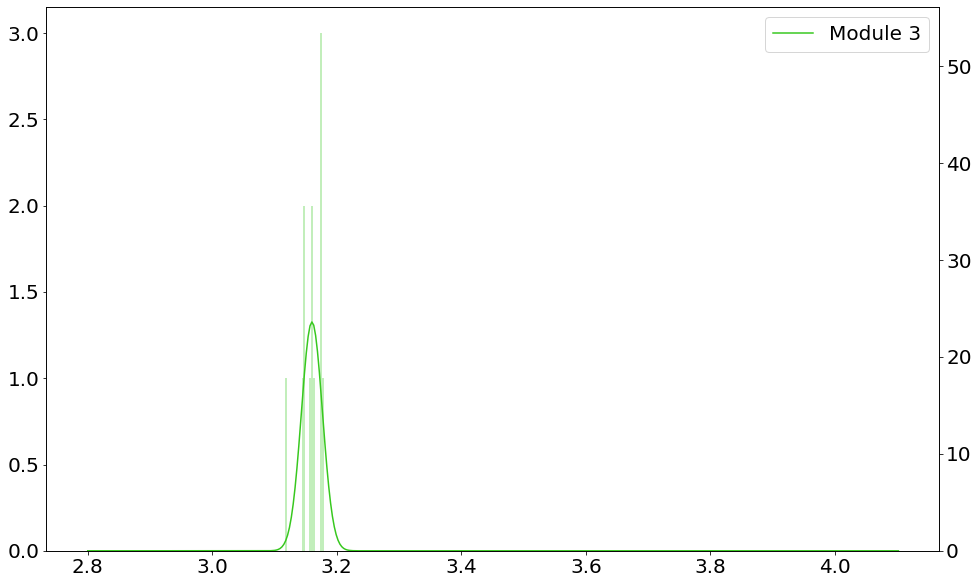

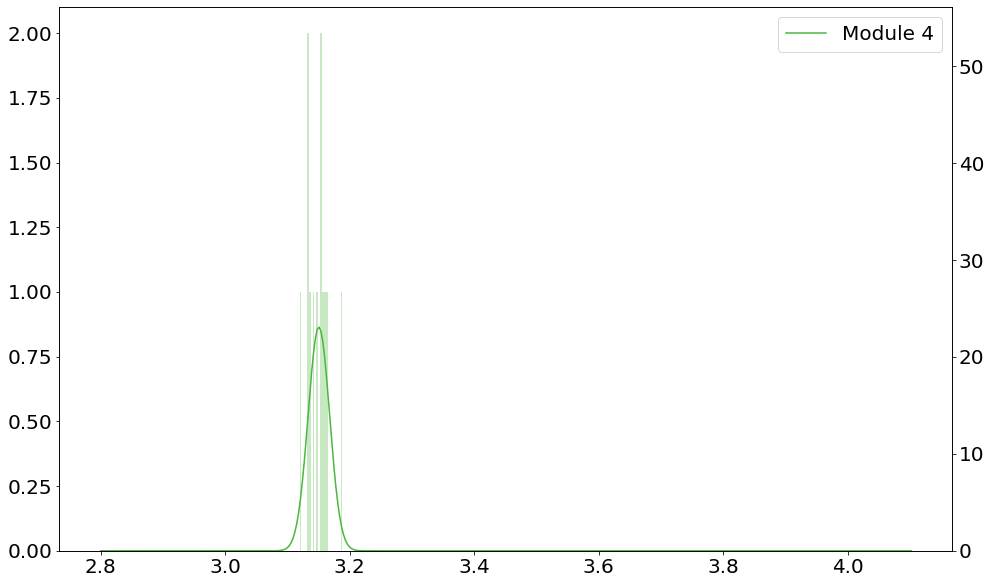

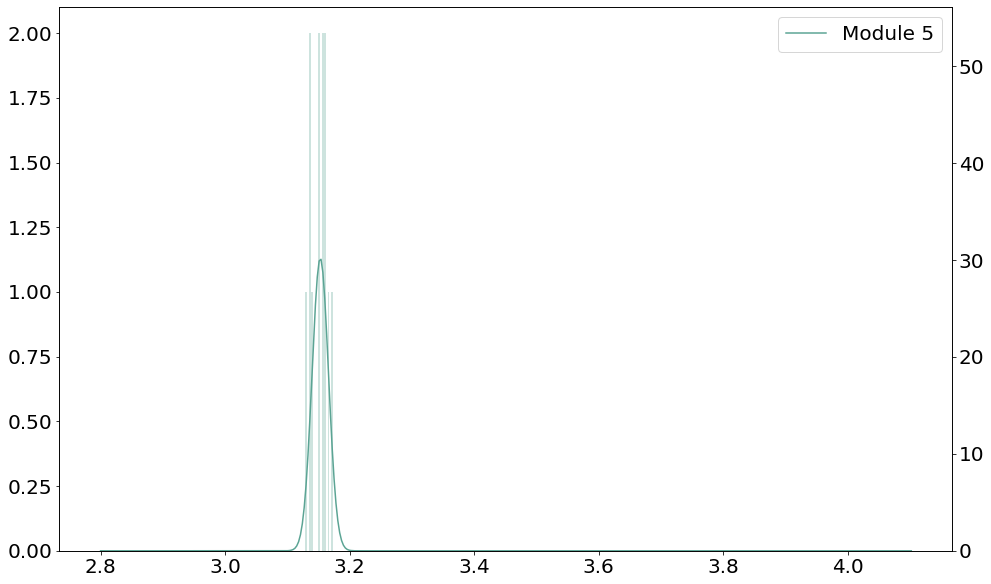

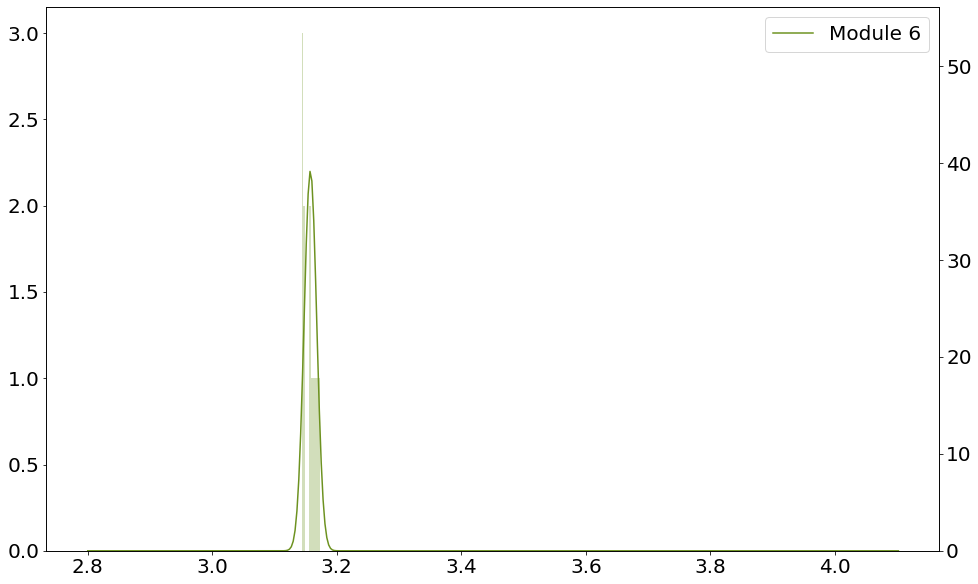

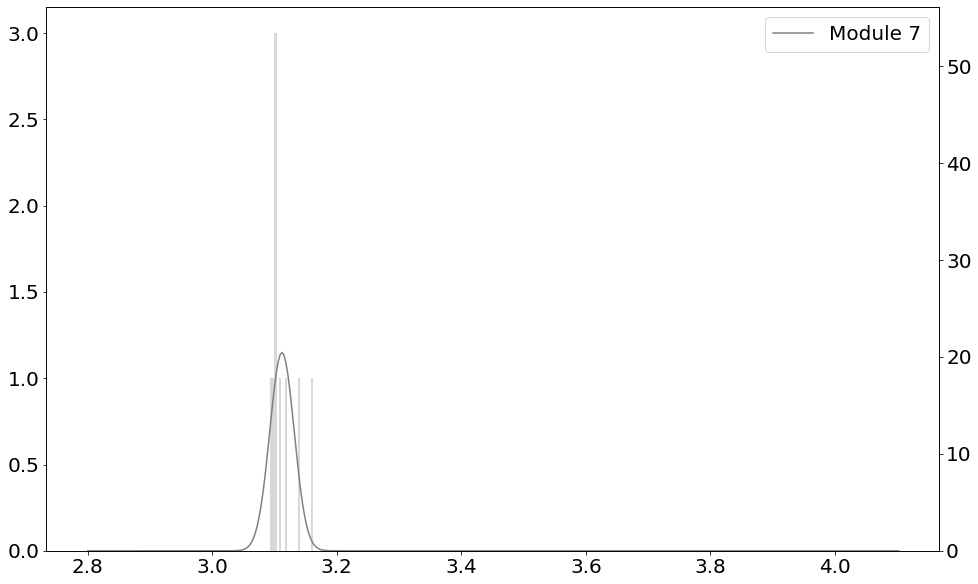

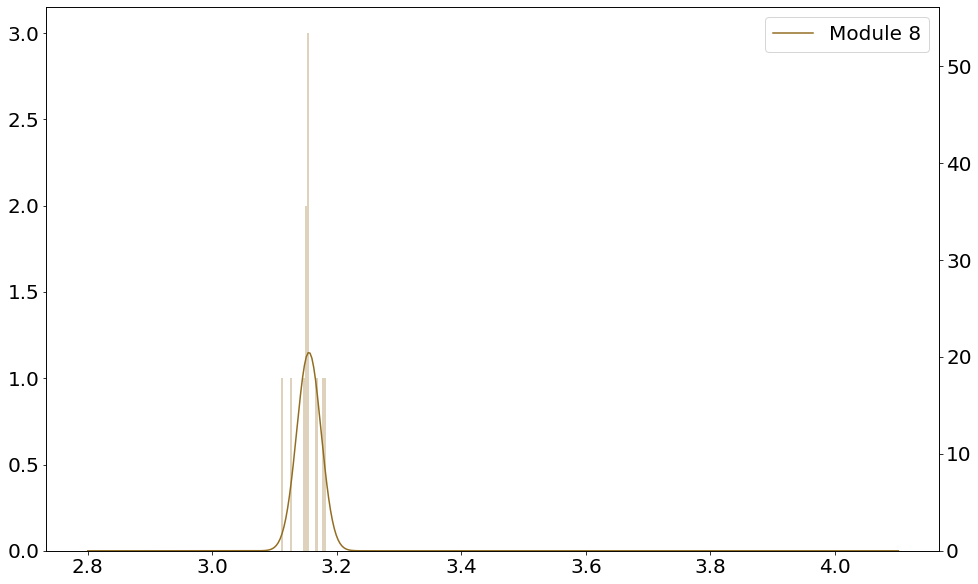

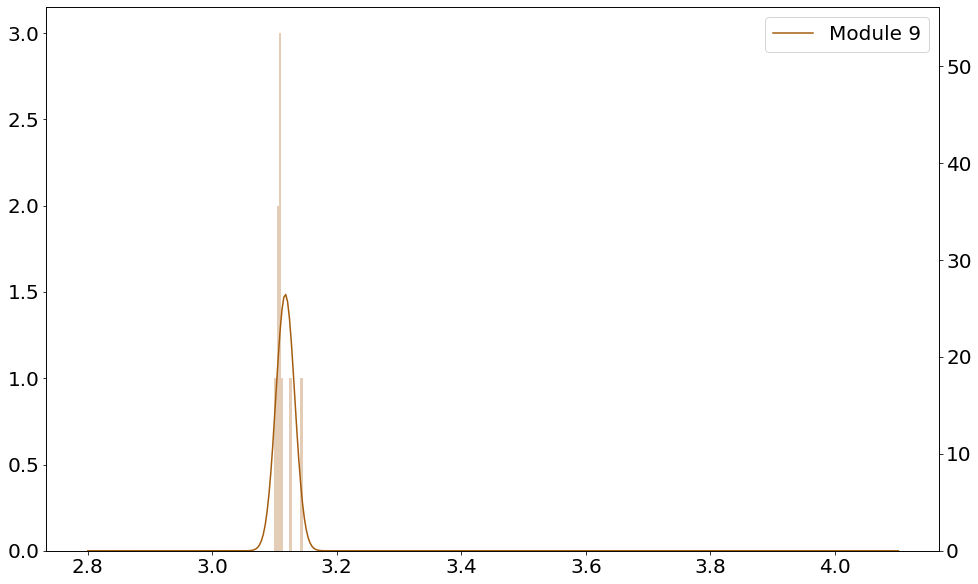

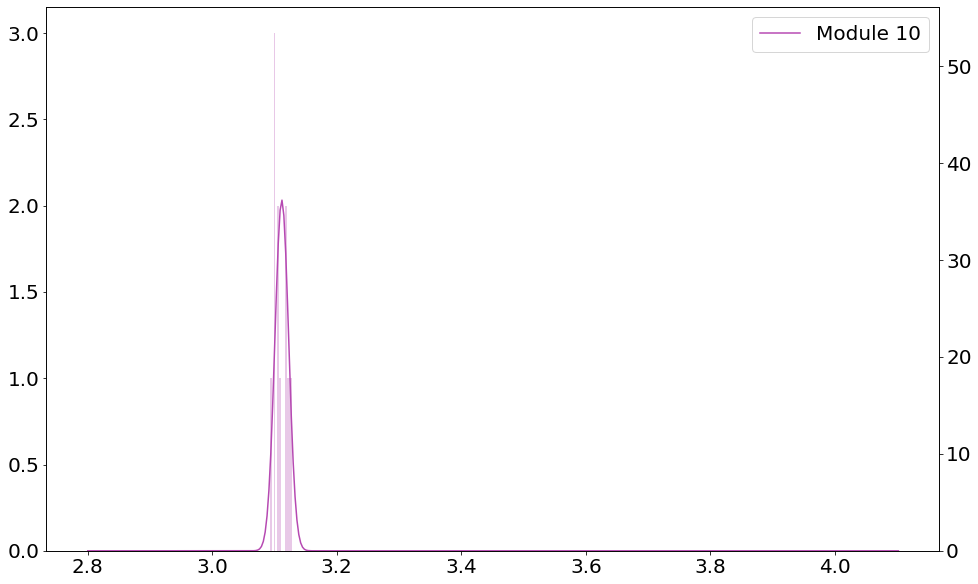

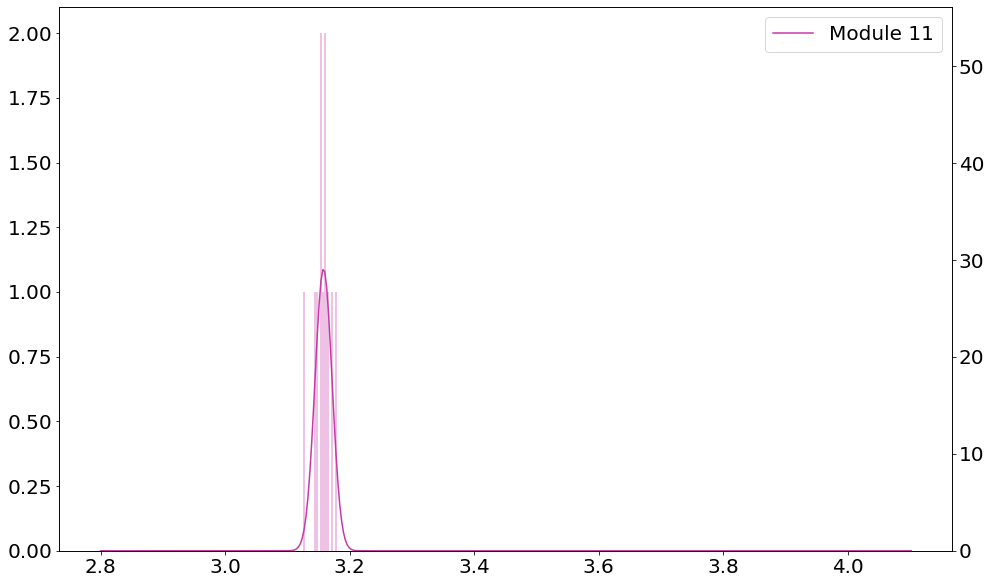

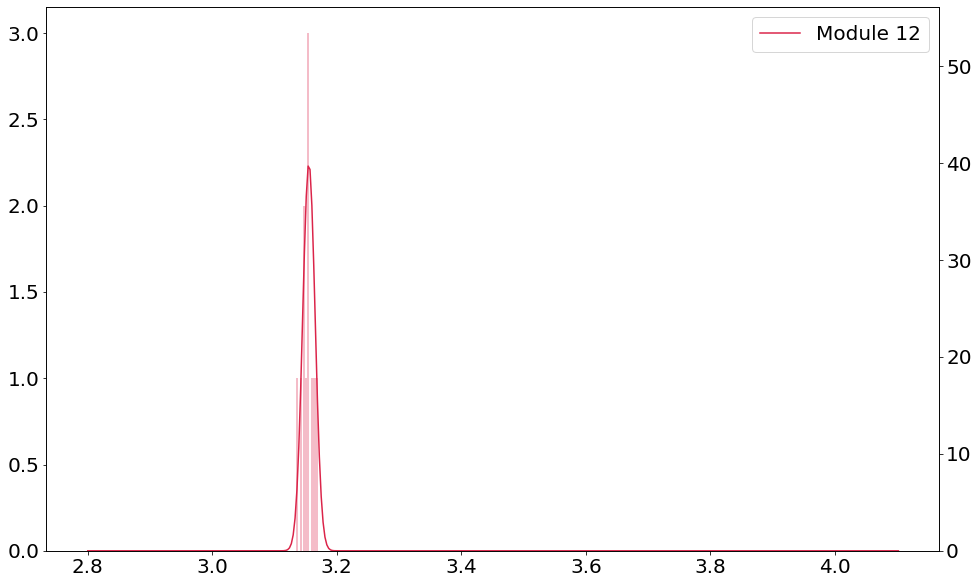

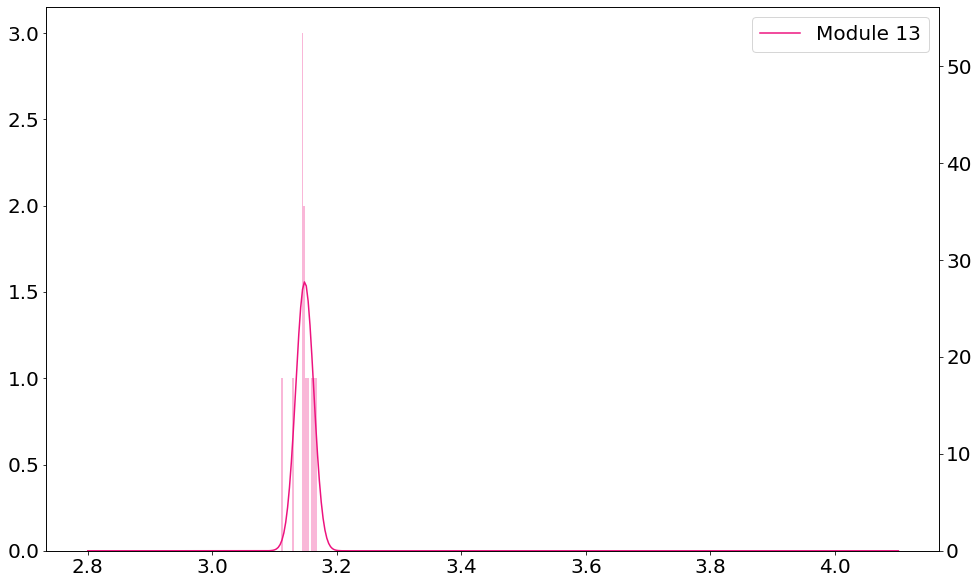

In [52]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import seaborn as sns

#Module별 cell 전압에 대한 Histograms(개별)

t = 40000
hist_std = 0.003

ymax = 0.0

for i in range(0,12*14,12):
    
    fig, ax1 = plt.subplots(figsize=(16,10))
    ax2 = ax1.twinx()

    mdata = df.iloc[t][i:i+12]

    mu = mdata.mean()
    sigma = mdata.std()
    
    n, bins = np.histogram(mdata, bins= [2.8 + hist_std*i for i in range(int((4.1-2.8)//hist_std)+2) ]) 

    r = i//12  / 14
    g = 1-r
    b = float(np.random.rand(1))
    
    
    #s = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    s = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(bins-mu)**2 / (2 * sigma**2))

    ax1.bar(bins[:-1],n, alpha = 0.3, width=hist_std, color=[r,g,b])
    ax2.plot(bins, s, alpha = 1, color=[r,g,b], label = f"Module {i//12}")
    
    ymax = max(ymax,max(s))
    ax2.set_ylim([0,ymax])
    
    ax2.legend()
    plt.show()
    
    #sns.distplot(mdata)
    #plt.show()
    
    
    #plt.show()
    
plt.show()

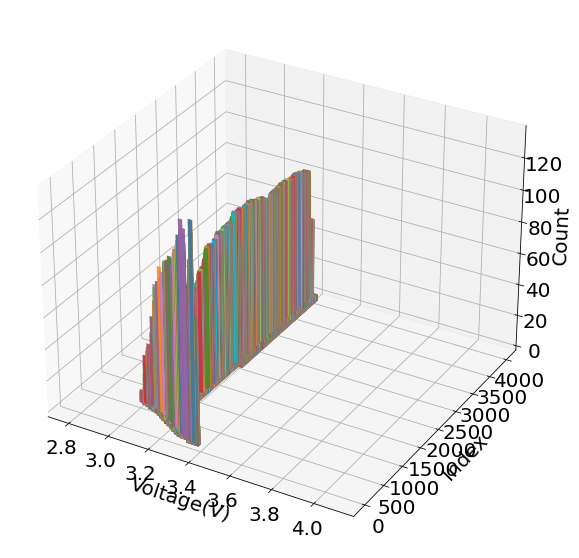

In [13]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

# 3-D Histograms
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
nbins = 30
#z_array = np.linspace(0,420,22)


X = df.index

for i in range(4000):
    z, y = np.histogram(df.iloc[i], bins= [2.8 + 0.02*i for i in range(int((4.1-2.8)//0.02+2)) ]) 
    ax.bar(y[:-1], z, zs=float(i), zdir='y', alpha=0.8, width=0.02)

ax.set_ylabel("Index")
ax.set_xlabel("Voltage(V)")
ax.set_zlabel("Count")
#plt.bar(Y[0][:-1],Z[0])
plt.show()

In [128]:
x, y = np.histogram(df.iloc[0], bins= [2.8 + 0.02*i for i in range(int((4.1-2.8)//0.03)+23) ]) 
print(x,y) 

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  8 25 47 75 12
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0] [2.8  2.82 2.84 2.86 2.88 2.9  2.92 2.94 2.96 2.98 3.   3.02 3.04 3.06
 3.08 3.1  3.12 3.14 3.16 3.18 3.2  3.22 3.24 3.26 3.28 3.3  3.32 3.34
 3.36 3.38 3.4  3.42 3.44 3.46 3.48 3.5  3.52 3.54 3.56 3.58 3.6  3.62
 3.64 3.66 3.68 3.7  3.72 3.74 3.76 3.78 3.8  3.82 3.84 3.86 3.88 3.9
 3.92 3.94 3.96 3.98 4.   4.02 4.04 4.06 4.08 4.1 ]


In [129]:
df.iloc[0]

Cell_Voltage1      3.2139
Cell_Voltage2      3.2060
Cell_Voltage3      3.1974
Cell_Voltage4      3.1805
Cell_Voltage5      3.2041
                    ...  
Cell_Voltage104    3.2214
Cell_Voltage105    3.2366
Cell_Voltage106    3.2391
Cell_Voltage107    3.2501
Cell_Voltage108    3.2538
Name: 2022-03-29 19:25:00, Length: 168, dtype: float64

<BarContainer object of 65 artists>

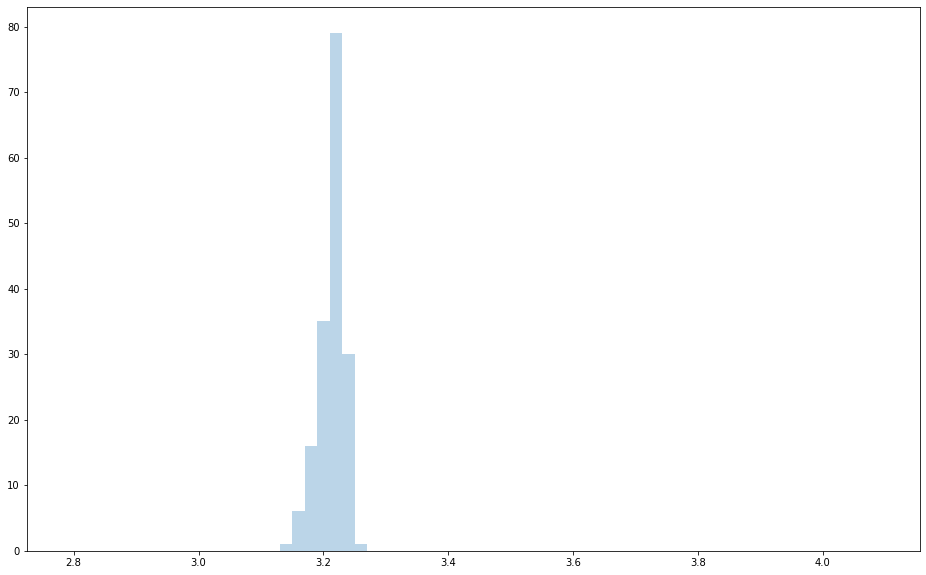

In [207]:
plt.bar(y[:-1], z,alpha=0.3, width=0.02)

In [204]:
z

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  6, 16, 35, 79, 30,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)